In [46]:
import pandas as pd
import numpy as np
import geopandas as gpd

In [47]:
import matplotlib.pyplot as plt

In [72]:
 %matplotlib inline

In [230]:
#abro la base de las encuestas
df = pd.read_csv('df_cuestionario.csv')

In [231]:
df.ubicacion_tot.unique()

array(['San Juan', 'Provincia de Buenos Aires',
       'Ciudad Autónoma de Buenos Aires', 'Santa Fe', 'Córdoba', 'Salta',
       'La Rioja', 'Otra provincia', 'Corrientes', 'Santa Cruz',
       'Misiones', 'Chubut', 'Chaco', 'Mendoza', 'San Luis', 'La Pampa',
       'Entre Ríos', 'Jujuy', 'Río Negro', 'Tierra del Fuego', 'Formosa',
       nan, 'Neuquén', 'Catamarca', 'Santiago del Estero'], dtype=object)

In [232]:
df_plt = df[df.ubicacion_tot != 'Otra provincia']
df_plt = df_plt[df_plt.ubicacion_tot.notnull()]

In [233]:
df_plt['freq_porubi'] = df_plt.groupby('ubicacion_tot')['ubicacion_tot'].transform('count') ###dejo una fila por provincia

In [234]:
df_plt = df_plt.loc[:, ['ubicacion_tot', 'freq_porubi']]

In [235]:
df_plt = df_plt.drop_duplicates('ubicacion_tot')

In [236]:
df_plt

,ubicacion_tot,freq_porubi
0,San Juan,7
1,Provincia de Buenos Aires,614
3,Ciudad Autónoma de Buenos Aires,115
5,Santa Fe,88
6,Córdoba,77
9,Salta,8
10,La Rioja,2
14,Corrientes,15
19,Santa Cruz,1
24,Misiones,20


In [237]:
df_plt.to_csv('/Users/luciadezan/Documents/Trabajo/IDLE/dfmapa.csv')

In [207]:
gdf = gpd.read_file("/Users/luciadezan/Documents/Trabajo/IDLE/ign_provincia/ign_provincia.shp", encoding='UTF-8')
#gdf = gdf.drop(columns=['ID_0','ISO', 'NAME_0', 'ID_1', 'TYPE_1', 'ENGTYPE_1', 'NL_NAME_1', 'VARNAME_1'])
gdf = gdf.rename(columns={'NAM': 'ubicacion_tot'})

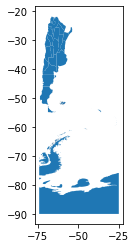

In [133]:
gdf.plot()

In [136]:
gdf

,OBJECTID,Entidad,Objeto,FNA,GNA,ubicacion_tot,SAG,FDC,IN1,SHAPE_STAr,SHAPE_STLe,geometry
0,427,0,Provincia,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma,Ciudad Autónoma de Buenos Aires,IGN,Geografía,02,0.020242,0.743806,"POLYGON Z ((-58.34189 -34.63110 0.00000, -58.3..."
1,428,0,Provincia,Provincia del Neuquén,Provincia,Neuquén,IGN,Geografía,58,9.771811,21.515985,"POLYGON Z ((-70.39345 -36.15526 0.00000, -70.3..."
2,429,0,Provincia,Provincia de La Pampa,Provincia,La Pampa,IGN,Geografía,42,14.553019,19.665614,"MULTIPOLYGON Z (((-64.76547 -40.78351 0.00000,..."
3,430,0,Provincia,Provincia de Mendoza,Provincia,Mendoza,IGN,Geografía,50,14.658388,23.259986,"POLYGON Z ((-69.12570 -32.00283 0.00000, -69.1..."
4,431,0,Provincia,Provincia de San Luis,Provincia,San Luis,IGN,Geografía,74,7.333771,14.490196,"POLYGON Z ((-67.05547 -31.85605 0.00000, -67.0..."
5,432,0,Provincia,Provincia de Córdoba,Provincia,Córdoba,IGN,Geografía,14,15.748328,18.453115,"POLYGON Z ((-63.87035 -29.62387 0.00000, -63.8..."
6,433,0,Provincia,Provincia de Santa Fe,Provincia,Santa Fe,IGN,Geografía,82,12.552838,20.852280,"POLYGON Z ((-60.27271 -33.26386 0.00000, -60.2..."
7,434,0,Provincia,Provincia de Entre Ríos,Provincia,Entre Ríos,IGN,Geografía,30,7.486487,14.359091,"POLYGON Z ((-58.58138 -30.16010 0.00000, -58.5..."
8,435,0,Provincia,Provincia de San Juan,Provincia,San Juan,IGN,Geografía,70,8.328441,19.445606,"POLYGON Z ((-69.62981 -28.39369 0.00000, -69.6..."
9,436,0,Provincia,Provincia de La Rioja,Provincia,La Rioja,IGN,Geografía,46,8.529216,16.426132,"POLYGON Z ((-68.52083 -27.81988 0.00000, -68.5..."


In [208]:
## cambio el df para ponerlo como en el df de mapa
df_plt = df_plt.replace({'ubicacion_tot': 'Provincia de Buenos Aires'}, 'Buenos Aires')
df_plt = df_plt.replace({'ubicacion_tot': 'Ciudad de Buenos Aires'}, 'Ciudad Autónoma de Buenos Aires')
df_plt = df_plt.replace({'ubicacion_tot': 'Tierra del Fuego'}, 'Tierra del Fuego, Antártida e Islas del Atlántico Sur')
df_plt = pd.merge(df_plt, gdf, how='left', on=['ubicacion_tot'])

In [118]:
#df_plt = df_plt.reset_index()

In [209]:
df_plt

,ubicacion_tot,freq_porubi,OBJECTID,Entidad,Objeto,FNA,GNA,SAG,FDC,IN1,SHAPE_STAr,SHAPE_STLe,geometry
0,San Juan,7,435,0,Provincia,Provincia de San Juan,Provincia,IGN,Geografía,70,8.328441,19.445606,"POLYGON Z ((-69.62981 -28.39369 0.00000, -69.6..."
1,Buenos Aires,614,447,0,Provincia,Provincia de Buenos Aires,Provincia,IGN,Geografía,06,30.805998,34.035576,"POLYGON Z ((-60.27237 -33.26349 0.00000, -60.2..."
2,Ciudad Autónoma de Buenos Aires,115,427,0,Provincia,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma,IGN,Geografía,02,0.020242,0.743806,"POLYGON Z ((-58.34189 -34.63110 0.00000, -58.3..."
3,Santa Fe,88,433,0,Provincia,Provincia de Santa Fe,Provincia,IGN,Geografía,82,12.552838,20.852280,"POLYGON Z ((-60.27271 -33.26386 0.00000, -60.2..."
4,Salta,8,450,0,Provincia,Provincia de Salta,Provincia,IGN,Geografía,66,13.817805,30.275950,"POLYGON Z ((-62.34230 -22.46084 0.00000, -62.3..."
5,La Rioja,2,436,0,Provincia,Provincia de La Rioja,Provincia,IGN,Geografía,46,8.529216,16.426132,"POLYGON Z ((-68.52083 -27.81988 0.00000, -68.5..."
6,Corrientes,15,448,0,Provincia,Provincia de Corrientes,Provincia,IGN,Geografía,18,8.235679,20.594672,"MULTIPOLYGON Z (((-56.86162 -27.59213 0.00000,..."
7,Santa Cruz,1,444,0,Provincia,Provincia de Santa Cruz,Provincia,IGN,Geografía,78,29.943876,40.835553,"MULTIPOLYGON Z (((-69.41581 -51.08958 0.00000,..."
8,Misiones,20,449,0,Provincia,Provincia de Misiones,Provincia,IGN,Geografía,54,2.717002,13.315559,"MULTIPOLYGON Z (((-53.67370 -26.33224 0.00000,..."
9,Chubut,18,445,0,Provincia,Provincia del Chubut,Provincia,IGN,Geografía,26,25.085834,38.837945,"MULTIPOLYGON Z (((-66.69852 -45.24747 0.00000,..."


In [210]:
# set a variable that will call whatever column we want to visualise on the map
#variable = 'freq_porubi'
# set the range for the choropleth
#vmin, vmax = 120, 220
# create figure and axes for Matplotlib
#fig, ax = plt.subplots(1, figsize=(10, 6))

In [211]:
#df_plt.plot(variable, cmap='Blues', linewidth=0.8, ax=ax)

con bokeh

In [122]:
from bokeh.plotting import figure, save
import matplotlib.pyplot as plt
import descartes
import shapely as sh
from bokeh.models import ColumnDataSource, HoverTool, LogColorMapper
import pysal as ps
from bokeh.plotting import show, output_file
from bokeh.plotting import output_notebook

In [123]:
##########CODIGO PARA SACAR X E Y
###SACAR LATITUD Y LONGITUD 
#Returns either x or y coordinates from  geometry coordinate sequence. Used with LineString and Polygon geometries."""
def getXYCoords(geometry, coord_type):
    if coord_type == 'x':
        return geometry.coords.xy[0]
    elif coord_type == 'y':
        return geometry.coords.xy[1]

def getPolyCoords(geometry, coord_type):
    #""" Returns Coordinates of Polygon using the Exterior of the Polygon."""
    ext = geometry.exterior
    return getXYCoords(ext, coord_type)

def getLineCoords(geometry, coord_type):
    #""" Returns Coordinates of Linestring object."""
    return getXYCoords(geometry, coord_type)

def getPointCoords(geometry, coord_type):
    #""" Returns Coordinates of Point object."""
    if coord_type == 'x':
        return geometry.x
    elif coord_type == 'y':
        return geometry.y

def multiGeomHandler(multi_geometry, coord_type, geom_type):
    #"""
    #Function for handling multi-geometries. Can be MultiPoint, MultiLineString or MultiPolygon.
    #Returns a list of coordinates where all parts of Multi-geometries are merged into a single list.
    #Individual geometries are separated with np.nan which is how Bokeh wants them.
    # Bokeh documentation regarding the Multi-geometry issues can be found here (it is an open issue)
    # https://github.com/bokeh/bokeh/issues/2321
    #"""

    for i, part in enumerate(multi_geometry):
        # On the first part of the Multi-geometry initialize the coord_array (np.array)
        if i == 0:
            if geom_type == "MultiPoint":
                coord_arrays = np.append(getPointCoords(part, coord_type), np.nan)
            elif geom_type == "MultiLineString":
                coord_arrays = np.append(getLineCoords(part, coord_type), np.nan)
            elif geom_type == "MultiPolygon":
                coord_arrays = np.append(getPolyCoords(part, coord_type), np.nan)
        else:
            if geom_type == "MultiPoint":
                coord_arrays = np.concatenate([coord_arrays, np.append(getPointCoords(part, coord_type), np.nan)])
            elif geom_type == "MultiLineString":
                coord_arrays = np.concatenate([coord_arrays, np.append(getLineCoords(part, coord_type), np.nan)])
            elif geom_type == "MultiPolygon":
                coord_arrays = np.concatenate([coord_arrays, np.append(getPolyCoords(part, coord_type), np.nan)])

    # Return the coordinates
    return coord_arrays


def getCoords(row, geom_col, coord_type):
    #"""
    #Returns coordinates ('x' or 'y') of a geometry (Point, LineString or Polygon) as a list (if geometry is LineString or Polygon).
    #Can handle also MultiGeometries.
    #"""
    # Get geometry
    geom = row[geom_col]

    # Check the geometry type
    gtype = geom.geom_type

    # "Normal" geometries
    # -------------------

    if gtype == "Point":
        return getPointCoords(geom, coord_type)
    elif gtype == "LineString":
        return list( getLineCoords(geom, coord_type) )
    elif gtype == "Polygon":
        return list( getPolyCoords(geom, coord_type) )

    # Multi geometries
    # ----------------

    else:
        return list( multiGeomHandler(geom, coord_type, gtype) )

In [212]:
df_plt['x'] = df_plt.apply(getCoords, geom_col='geometry', coord_type='x', axis=1)
df_plt['y'] = df_plt.apply(getCoords, geom_col='geometry', coord_type='y', axis=1)

In [215]:
df_plt = df_plt.drop('geometry', axis=1).copy()

KeyError: "['geometry'] not found in axis"

In [216]:
df_plt

,ubicacion_tot,freq_porubi,OBJECTID,Entidad,Objeto,FNA,GNA,SAG,FDC,IN1,SHAPE_STAr,SHAPE_STLe,x,y
0,San Juan,7,435,0,Provincia,Provincia de San Juan,Provincia,IGN,Geografía,70,8.328441,19.445606,"[-69.62981019099993, -69.62956269999995, -69.6...","[-28.39369204999997, -28.39396336699997, -28.3..."
1,Buenos Aires,614,447,0,Provincia,Provincia de Buenos Aires,Provincia,IGN,Geografía,06,30.805998,34.035576,"[-60.272374990999936, -60.27206582399998, -60....","[-33.26348632899993, -33.263460658999975, -33...."
2,Ciudad Autónoma de Buenos Aires,115,427,0,Provincia,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma,IGN,Geografía,02,0.020242,0.743806,"[-58.34188739699994, -58.342397275999986, -58....","[-34.631096716999934, -34.63127918799995, -34...."
3,Santa Fe,88,433,0,Provincia,Provincia de Santa Fe,Provincia,IGN,Geografía,82,12.552838,20.852280,"[-60.272714108999935, -60.273219024999946, -60...","[-33.26386310199996, -33.26454622299997, -33.2..."
4,Salta,8,450,0,Provincia,Provincia de Salta,Provincia,IGN,Geografía,66,13.817805,30.275950,"[-62.34229970599995, -62.34229969799998, -62.3...","[-22.46084008799994, -22.460869419999938, -22...."
5,La Rioja,2,436,0,Provincia,Provincia de La Rioja,Provincia,IGN,Geografía,46,8.529216,16.426132,"[-68.52082545399998, -68.52011161599995, -68.5...","[-27.81988008299993, -27.821188786999983, -27...."
6,Corrientes,15,448,0,Provincia,Provincia de Corrientes,Provincia,IGN,Geografía,18,8.235679,20.594672,"[-56.861615221999955, -56.86046533199993, -56....","[-27.592127837999953, -27.592647142999965, -27..."
7,Santa Cruz,1,444,0,Provincia,Provincia de Santa Cruz,Provincia,IGN,Geografía,78,29.943876,40.835553,"[-69.41580963099995, -69.41230010999993, -69.4...","[-51.08957672099996, -51.09058761599994, -51.0..."
8,Misiones,20,449,0,Provincia,Provincia de Misiones,Provincia,IGN,Geografía,54,2.717002,13.315559,"[-53.673699005999936, -53.67391791599994, -53....","[-26.332243620999975, -26.33250060299997, -26...."
9,Chubut,18,445,0,Provincia,Provincia del Chubut,Provincia,IGN,Geografía,26,25.085834,38.837945,"[-66.69851684599996, -66.69920349099993, -66.6...","[-45.247474669999974, -45.24748992899998, -45...."


In [186]:
import geopandas

In [218]:
df_plt = geopandas.GeoDataFrame(
    df_plt, geometry=geopandas.points_from_xy(df_plt.x, df_plt.y))

ValueError: setting an array element with a sequence.

In [157]:
gsource = ColumnDataSource(gdf)

In [158]:
from bokeh.palettes import RdYlBu11 as palette
from bokeh.models import LogColorMapper
# Create the color mapper
color_mapper = LogColorMapper(palette=palette)

In [159]:
p = figure(title="Encuestados por ubicación geográfica")

# Plot grid
p.patches('x', 'y', source=gsource,
         fill_color={'field': 'freq_porubi', 'transform': color_mapper},
         fill_alpha=1.0, line_color="black", line_width=0.05)
#Display figure inline in Jupyter Notebook.
#output_notebook()#Display figure.
show(p)
# Save the figure
#outfp = r"map.html"
#save(p, outfp)

ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name. This could either be due to a misspelling or typo, or due to an expected column being missing. : key "fill_color" value "freq_porubi", key "xs" value "x", key "ys" value "y" [renderer: GlyphRenderer(id='1373', ...)]


TypeError: Object of type Polygon is not JSON serializable

In [169]:
from bokeh.io import output_file, show
from bokeh.models import GeoJSONDataSource
from bokeh.plotting import figure
from bokeh.sampledata.sample_geojson import geojson
from bokeh.models import LogColorMapper
from bokeh.palettes import Viridis6 as palette


In [161]:
data=dict(
    x=df_plt.x,
    y=df_plt.y,
    name=df_plt.ubicacion_tot,
    rate=df_plt.freq_porubi,
)

TOOLS = "pan,wheel_zoom,reset,hover,save"

p = figure(
    title="Encuestados por provincia", tools=TOOLS,
    x_axis_location=None, y_axis_location=None,
    tooltips=[
        ("Nombre", "@name"), ("Encuestados", "@rate%"), ("(Long, Lat)", "($x, $y)")
    ])
p.grid.grid_line_color = None
p.hover.point_policy = "follow_mouse"

p.patches('x', 'y', source=data,
          fill_color={'field': 'rate', 'transform': color_mapper},
          fill_alpha=0.7, line_color="white", line_width=0.5)

show(p)

ValueError: Out of range float values are not JSON compliant